In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import praw
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from datetime import datetime, timedelta

[nltk_data] Downloading package vader_lexicon to C:\Users\Dell
[nltk_data]     Inspiron 7706\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
reddit=praw.Reddit(
    client_id="",
    client_secret="",
    user_agent=""
)

In [3]:
ids,headlines,submissions,authors,created_utcs,upvotes,upvotesPercentage,urls,numcomments=[],[],[],[],[],[],[],[],[]

for subred in reddit.subreddit('Palestine').hot(limit=None):
  ids.append(subred.id)
  headlines.append(subred.title)
  submission = reddit.submission(id=subred.id).selftext
  submissions.append(submission)
  authors.append(subred.author)
  times = subred.created_utc
  datetimes = datetime.utcfromtimestamp(times)
  created_utcs.append(datetimes.strftime('%Y-%m-%d'))
  upvotes.append(subred.score)
  upvotesPercentage.append(subred.upvote_ratio)
  urls.append(subred.url)
  numcomments.append(subred.num_comments)
data={
    'ID':ids,
    'Titre':headlines,
    'Submission':submissions,
    'Auteur':authors,
    'Temps de création':created_utcs,
    'Up votes':upvotes,
    'Poucentage des up votes':upvotesPercentage,
    'Nombre de commentaire':numcomments
}
df=pd.DataFrame(data)

In [4]:
df

,ID,Titre,Submission,Auteur,Temps de création,Up votes,Poucentage des up votes,Nombre de commentaire
0,18ext8v,🇵🇸 📢 Megathread and Discord Alert! 📢🇵🇸 - Dec 10th,# Please keep all discussions in this megathre...,sabbah,2023-12-10,71,0.93,85
1,190vpaq,Calling for Temporary Mods to Assist with r/Pa...,"Hello, r/Palestine community,\n\nAs our subred...",sabbah,2024-01-07,33,0.83,2
2,19ah9n6,These people are nuts. How do you be so noncha...,,SapienMystique,2024-01-19,781,0.93,148
3,19aelz1,Footage of Israeli Army blowing up civilian ar...,,TheExperimentalDoge,2024-01-19,1182,0.93,122
4,19ai4tg,Hate Crime and Stalking Charges Against Ex Whi...,Stuart Seldowitz has agreed to complete an ant...,Dependent_Ad5298,2024-01-19,501,0.99,51
...,...,...,...,...,...,...,...,...
691,1932ees,Israel is Terrified the World Court will Decid...,,RollyMcPolly,2024-01-10,59,0.97,6
692,192n0r8,Tottenham Caller on Israeli War Crimes - PART 2,,AfricanStream,2024-01-09,416,0.98,21
693,192q9b1,New York Protest in 1960 while the Algerian Wa...,,AmaraMehdi,2024-01-09,275,0.98,9
694,193fj37,Studio mixes for all 20 tracks for the new alb...,,davidrovics,2024-01-10,6,0.80,1


In [5]:
ids,headlines,submissions,authors,created_utcs,upvotes,upvotesPercentage,urls,numcomments=[],[],[],[],[],[],[],[],[]

for subred in reddit.subreddit('Palestine').top(limit=None):
  ids.append(subred.id)
  headlines.append(subred.title)
  submission = reddit.submission(id=subred.id).selftext
  submissions.append(submission)
  authors.append(subred.author)
  times = subred.created_utc
  datetimes = datetime.utcfromtimestamp(times)
  created_utcs.append(datetimes.strftime('%Y-%m-%d'))
  upvotes.append(subred.score)
  upvotesPercentage.append(subred.upvote_ratio)
  urls.append(subred.url)
  numcomments.append(subred.num_comments)
data={
    'ID':ids,
    'Titre':headlines,
    'Submission':submissions,
    'Auteur':authors,
    'Temps de création':created_utcs,
    'Up votes':upvotes,
    'Poucentage des up votes':upvotesPercentage,
    'Nombre de commentaire':numcomments
}
df_top=pd.DataFrame(data)

In [6]:
df_top

,ID,Titre,Submission,Auteur,Temps de création,Up votes,Poucentage des up votes,Nombre de commentaire
0,jaq3qp,A Jewish brother takes a stand.,,None,2020-10-14,10915,0.97,1356
1,un1fly,BREAKING: Al Jazeera’s senior correspondent Sh...,,Omar941,2022-05-11,8361,0.94,531
2,133lwd0,Crow removes Israeli flag from being displayed.,,SSRedBack,2023-04-30,7881,0.89,391
3,nih1xy,The territory is now Rome,,BobBreak,2021-05-22,7442,0.91,549
4,ndv4a0,This is how I walked the stage yesterday #Free...,,None,2021-05-16,6656,0.94,242
...,...,...,...,...,...,...,...,...
986,172ued0,"Hasan Piker, also known as HasanAbi, who is a ...",,hunegypt,2023-10-08,948,0.85,92
987,115ew4n,The smile of a champion ❤️🇵🇸,,FeministPalestinian,2023-02-18,942,0.96,39
988,cziw00,Israeli settler pointing his gun at Palestinia...,,Slave_Rebellion,2019-09-04,942,0.96,87
989,112boc5,Sarajevo Bosnia and Herzegowina. ❤️ Palestine,,Denniis27,2023-02-14,943,0.97,12


In [7]:
ids,headlines,submissions,authors,created_utcs,upvotes,upvotesPercentage,urls,numcomments=[],[],[],[],[],[],[],[],[]

for subred in reddit.subreddit('Palestine').controversial(limit=None):
  ids.append(subred.id)
  headlines.append(subred.title)
  submission = reddit.submission(id=subred.id).selftext
  submissions.append(submission)
  authors.append(subred.author)
  times = subred.created_utc
  datetimes = datetime.utcfromtimestamp(times)
  created_utcs.append(datetimes.strftime('%Y-%m-%d'))
  upvotes.append(subred.score)
  upvotesPercentage.append(subred.upvote_ratio)
  urls.append(subred.url)
  numcomments.append(subred.num_comments)
data={
    'ID':ids,
    'Titre':headlines,
    'Submission':submissions,
    'Auteur':authors,
    'Temps de création':created_utcs,
    'Up votes':upvotes,
    'Poucentage des up votes':upvotesPercentage,
    'Nombre de commentaire':numcomments
}
df_controversial=pd.DataFrame(data)

In [8]:
df_controversial

,ID,Titre,Submission,Auteur,Temps de création,Up votes,Poucentage des up votes,Nombre de commentaire
0,xdnwu2,Petition,Petition for the removal of Sabra from the Mar...,tshuqom,2022-09-14,0,0.50,36
1,17208is,"Palestinians have the right to resist, not mer...",,OnePalestine,2023-10-07,0,0.49,35
2,1728ttm,Absurd (but expected) US govt response to free...,This is (one of the reasons) why I reject any ...,ncream1,2023-10-07,0,0.49,32
3,1727pfa,Love from Nigeria 🇳🇬❤️🇵🇸,"I can’t speak for our whole country, but there...",OhCountryMyCountry,2023-10-07,6,0.51,3
4,17247lf,Not everyone is the same on western platforms,Reported a racist comment against Muslims as h...,LosMensajeros,2023-10-07,5,0.51,36
...,...,...,...,...,...,...,...,...
989,174olu5,I often think of this picture of Edward Said t...,,sonicdreams56,2023-10-10,232,0.78,13
990,16s3cei,"Palestine and Western Sahara, Same Cause, Same...",,painpaixliberte,2023-09-25,397,0.80,133
991,17b8vnx,*Israel literally funding or getting bankrolle...,,Confident_Fishing693,2023-10-19,20,0.68,6
992,199ps8v,The tears won’t stop falling. When will this g...,May god cover and protect the last surviving c...,N0tT0daySatan1,2024-01-18,2169,0.83,369


In [9]:
data = pd.concat([df_controversial,df,df_top],ignore_index=True)

In [10]:
data

,ID,Titre,Submission,Auteur,Temps de création,Up votes,Poucentage des up votes,Nombre de commentaire
0,xdnwu2,Petition,Petition for the removal of Sabra from the Mar...,tshuqom,2022-09-14,0,0.50,36
1,17208is,"Palestinians have the right to resist, not mer...",,OnePalestine,2023-10-07,0,0.49,35
2,1728ttm,Absurd (but expected) US govt response to free...,This is (one of the reasons) why I reject any ...,ncream1,2023-10-07,0,0.49,32
3,1727pfa,Love from Nigeria 🇳🇬❤️🇵🇸,"I can’t speak for our whole country, but there...",OhCountryMyCountry,2023-10-07,6,0.51,3
4,17247lf,Not everyone is the same on western platforms,Reported a racist comment against Muslims as h...,LosMensajeros,2023-10-07,5,0.51,36
...,...,...,...,...,...,...,...,...
2676,172ued0,"Hasan Piker, also known as HasanAbi, who is a ...",,hunegypt,2023-10-08,948,0.85,92
2677,115ew4n,The smile of a champion ❤️🇵🇸,,FeministPalestinian,2023-02-18,942,0.96,39
2678,cziw00,Israeli settler pointing his gun at Palestinia...,,Slave_Rebellion,2019-09-04,942,0.96,87
2679,112boc5,Sarajevo Bosnia and Herzegowina. ❤️ Palestine,,Denniis27,2023-02-14,943,0.97,12


In [13]:
data ['Temps de création']

0       2022-09-14
1       2023-10-07
2       2023-10-07
3       2023-10-07
4       2023-10-07
           ...    
2676    2023-10-08
2677    2023-02-18
2678    2019-09-04
2679    2023-02-14
2680    2022-12-05
Name: Temps de création, Length: 2681, dtype: object

In [ ]:
data.to_csv('Palestine.csv',encoding='utf-8')

In [15]:
titre_column = data['Titre']
print(titre_column)
titre_df = pd.DataFrame({'Titre': titre_column})
print(titre_df)


0                                                Petition
1       Palestinians have the right to resist, not mer...
2       Absurd (but expected) US govt response to free...
3                                Love from Nigeria 🇳🇬❤️🇵🇸
4           Not everyone is the same on western platforms
                              ...                        
2676    Hasan Piker, also known as HasanAbi, who is a ...
2677                         The smile of a champion ❤️🇵🇸
2678    Israeli settler pointing his gun at Palestinia...
2679        Sarajevo Bosnia and Herzegowina. ❤️ Palestine
2680                                        'Hate speech'
Name: Titre, Length: 2681, dtype: object
                                                  Titre
0                                              Petition
1     Palestinians have the right to resist, not mer...
2     Absurd (but expected) US govt response to free...
3                              Love from Nigeria 🇳🇬❤️🇵🇸
4         Not everyone is the same on wes

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

# Assuming 'Titre' is the column containing headlines in your DataFrame titre_df
for line in titre_df['Titre']:
    pol_score = sia.polarity_scores(line)
    pol_score['Titre'] = line
    results.append(pol_score)

# Create a new DataFrame with sentiment scores
df_sentiment_titre = pd.DataFrame.from_records(results)

# Add a 'score' column based on compound sentiment scores
df_sentiment_titre['score'] = 0
df_sentiment_titre.loc[df_sentiment_titre['compound'] < -0.2, 'score'] = -1
df_sentiment_titre.loc[df_sentiment_titre['compound'] > 0.2, 'score'] = 1

# Create a DataFrame with 'headline' and 'score' columns
df_result_titre = df_sentiment_titre[['Titre', 'score']]

# Print or use df_result_titre as needed
print(df_result_titre)


                                                  Titre  score
0                                              Petition      0
1     Palestinians have the right to resist, not mer...      0
2     Absurd (but expected) US govt response to free...      1
3                              Love from Nigeria 🇳🇬❤️🇵🇸      1
4         Not everyone is the same on western platforms      0
...                                                 ...    ...
2676  Hasan Piker, also known as HasanAbi, who is a ...      0
2677                       The smile of a champion ❤️🇵🇸      1
2678  Israeli settler pointing his gun at Palestinia...     -1
2679      Sarajevo Bosnia and Herzegowina. ❤️ Palestine      0
2680                                      'Hate speech'     -1

[2681 rows x 2 columns]


In [19]:
df_result_titre.score.value_counts()

score
 0    1136
-1     968
 1     577
Name: count, dtype: int64

In [20]:
df_result_titre.score.value_counts(normalize=True)*100

score
 0    42.372249
-1    36.105931
 1    21.521820
Name: proportion, dtype: float64

In [23]:
# Assuming 'Titre' is the common column in both DataFrames
merged_df = pd.merge(data, df_result_titre, on='Titre', how='inner')

# Print or use the merged DataFrame as needed
print(merged_df)


           ID                                              Titre  \
0      xdnwu2                                           Petition   
1     17208is  Palestinians have the right to resist, not mer...   
2     1728ttm  Absurd (but expected) US govt response to free...   
3     1727pfa                           Love from Nigeria 🇳🇬❤️🇵🇸   
4     17247lf      Not everyone is the same on western platforms   
...       ...                                                ...   
2890  172ued0  Hasan Piker, also known as HasanAbi, who is a ...   
2891  115ew4n                       The smile of a champion ❤️🇵🇸   
2892   cziw00  Israeli settler pointing his gun at Palestinia...   
2893  112boc5      Sarajevo Bosnia and Herzegowina. ❤️ Palestine   
2894   zd0z5w                                      'Hate speech'   

                                             Submission               Auteur  \
0     Petition for the removal of Sabra from the Mar...              tshuqom   
1                      

In [24]:

merged_df.to_csv('merged_data.csv', index=False)

In [25]:
import os
print(os.getcwd())


C:\Users\Dell Inspiron 7706


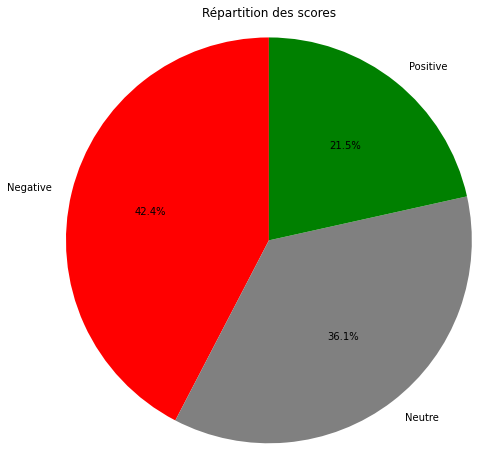

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Assuming DF is your DataFrame with the 'score' column
counts = df_result_titre['score'].value_counts(normalize=True) * 100

# Plotting a pie chart
ax.pie(counts, labels=['Negative', 'Neutre', 'Positive'], autopct='%1.1f%%', startangle=90, colors=['red', 'grey', 'green'])
ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

ax.set_title('Répartition des scores')

plt.show()


In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

# Assuming 'Submission' is the column containing text in your DataFrame titre_df
for text in data['Submission']:
    pol_score = sia.polarity_scores(text)
    pol_score['Submission'] = text
    results.append(pol_score)

# Create a new DataFrame with sentiment scores
df_sentiment_submission = pd.DataFrame.from_records(results)

# Add a 'score' column based on compound sentiment scores
df_sentiment_submission['score'] = 0
df_sentiment_submission.loc[df_sentiment_submission['compound'] < -0.2, 'score'] = -1
df_sentiment_submission.loc[df_sentiment_submission['compound'] > 0.2, 'score'] = 1

# Create a DataFrame with 'Submission' and 'score' columns
df_result_submission = df_sentiment_submission[['Submission', 'score']]

# Print or use df_result_submission as needed
print(df_result_submission)


                                             Submission  score
0     Petition for the removal of Sabra from the Mar...      1
1                                                            0
2     This is (one of the reasons) why I reject any ...     -1
3     I can’t speak for our whole country, but there...     -1
4     Reported a racist comment against Muslims as h...     -1
...                                                 ...    ...
2676                                                         0
2677                                                         0
2678                                                         0
2679                                                         0
2680                                                         0

[2681 rows x 2 columns]


In [33]:
df_result_submission.score.value_counts()

score
 0    2203
-1     245
 1     233
Name: count, dtype: int64

In [34]:
df_result_titre.score.value_counts(normalize=True)*100

score
-1.0    51.25523
 1.0    48.74477
Name: proportion, dtype: float64

In [36]:
# Assuming 'Titre' is the common column in both DataFrames
merged_df_2 = pd.merge(data, df_result_submission, on='Submission', how='inner')

# Print or use the merged DataFrame as needed
print(merged_df_2)


              ID                                              Titre  \
0         xdnwu2                                           Petition   
1        17208is  Palestinians have the right to resist, not mer...   
2        17208is  Palestinians have the right to resist, not mer...   
3        17208is  Palestinians have the right to resist, not mer...   
4        17208is  Palestinians have the right to resist, not mer...   
...          ...                                                ...   
4310402  18hwa10  How Palestinians Are Becoming Doctors In Cuba ...   
4310403  18fa3f0  [NSFW] Al-Qassam Brigades clashing IOF in Khan...   
4310404  18qzj6n                                         ‘Israeled’   
4310405  180ifx3  It begins. Biden & Netanyahu to discuss "Poten...   
4310406  17rmqz9  “Why won’t other Arab countries take those Pal...   

                                                Submission            Auteur  \
0        Petition for the removal of Sabra from the Mar...         

In [37]:
merged_df_2.to_csv('merged_data_2.csv', index=False)

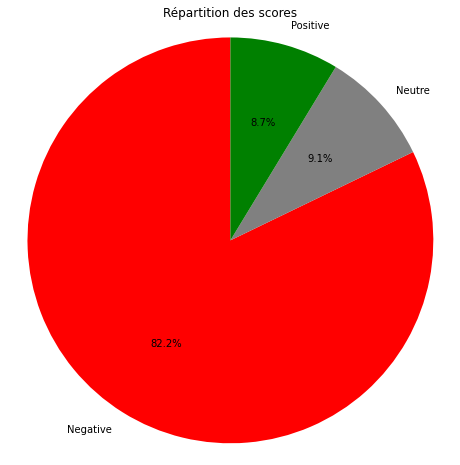

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Assuming DF is your DataFrame with the 'score' column
counts = df_result_submission['score'].value_counts(normalize=True) * 100

# Plotting a pie chart
ax.pie(counts, labels=['Negative', 'Neutre', 'Positive'], autopct='%1.1f%%', startangle=90, colors=['red', 'grey', 'green'])
ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

ax.set_title('Répartition des scores')

plt.show()